In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


import warnings
warnings.filterwarnings("default")

In [2]:
def plot_over_time(df, x_col='Day', y_col='H2', hue_col='Trait',
                      title='H² of LDA Over Time',legend_loc='upper left',show_legend=True,
                      figsize=(8, 5), save_path=None):

    # Create figure
    plt.figure(figsize=figsize)

    # Line plot
    sns.lineplot(data=df, x=x_col, y=y_col, hue=hue_col, marker='o', linewidth=2, legend=show_legend)

    # Style adjustments
    plt.xticks(ticks=df[x_col].unique(), labels=df[x_col].unique(), rotation=45)  # <-- set ticks same as Day
    plt.ylabel(y_col, fontsize=12)
    plt.xlabel("Time", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)
    plt.tight_layout()

    if show_legend:
        plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)

    # Save if needed
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Plot saved to {save_path}")

    plt.show()

In [3]:
def plot_heatmap(df, index_col='Trait', columns_col='Day', values_col='H2',
                            title="Heritability (H²) by Day and Metric",
                            figsize=(10, 6), cmap="YlGnBu", annot=True, fmt=".2f",
                            cbar_label="H²", show=True, save_path=None):
    
    # Pivot the data
    heatmap_data = df.pivot(index=index_col, columns=columns_col, values=values_col)
    
    # Set Seaborn style
    sns.set(style="whitegrid")
    
    # Create figure
    plt.figure(figsize=figsize)
    
    # Draw the heatmap
    ax = sns.heatmap(
        heatmap_data,
        annot=annot,
        fmt=fmt,
        cmap=cmap,
        cbar_kws={'label': cbar_label},
        linewidths=0.5,        # thin lines between cells
        linecolor='gray',
        square=False,
        annot_kws={"size": 10}, # annotation text size
        xticklabels=True,
        yticklabels=True
    )
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    
    # Place the y-axis ticks in the center of each cell
    ax.yaxis.set_tick_params(length=0)
    
    # Labels and title
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel(columns_col, fontsize=12)
    plt.ylabel(index_col, fontsize=12)
    
    plt.tight_layout()
    
    # Save if needed
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Heatmap saved to {save_path}")
    
    if show:
        plt.show()

### 0 Side and top Analysis
There are 2 datasets from the experiment: top and side.

In [60]:
side_features_df1 = pd.read_csv('../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features_vit.csv')
top_features_df1 = pd.read_csv('../data/5.25.2024_CBI.0010_York_Poplar_RGB.top_features_vit.csv')


In [61]:

print(side_features_df1['Plant Name'].unique())
print(top_features_df1['Plant Name'].unique())

['Poplar']
['Poplar']


/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/2070176698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)


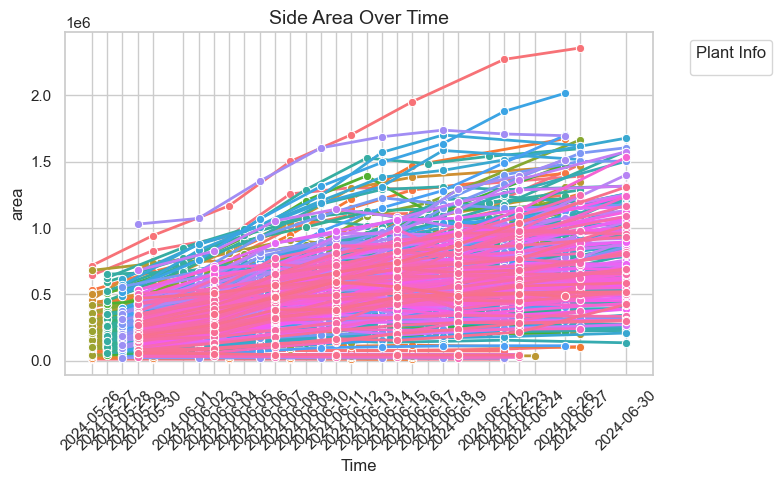

In [62]:
side_features_df1['Analyse Date'] = pd.to_datetime(side_features_df1['Analyse Date'], errors='coerce')
side_features_df1['Date'] = side_features_df1['Analyse Date'].dt.date
plot_over_time(side_features_df1, x_col='Date', y_col='area', hue_col='Plant Info',
                      title='Side Area Over Time',show_legend=False)

In [63]:
top_features_df1['Date'] =  pd.to_datetime(top_features_df1['Analyse Date']).dt.date

#### Columns

In [64]:
# delete unnecessary columns
side_features_df1 = side_features_df1.drop(columns=['Round Order', 'Round Status', 'Plant Name','File Path'])
top_features_df1 = top_features_df1.drop(columns=['Round Order', 'Round Status', 'Plant Name','File Path'])

In [65]:
only_in_sidefeature = set(side_features_df1.columns) - set(top_features_df1.columns)

only_in_topfeature = set(top_features_df1.columns) - set(side_features_df1.columns)

print("Columns only in side feature:", only_in_sidefeature)
print("Columns only in top feature:", only_in_topfeature)

Columns only in side feature: {'width', 'height'}
Columns only in top feature: {'minarea_rect_width', 'minarea_rect_height'}


In [66]:
# check columns from different dataframes
# there is no 'minarea_rect_height', 'minarea_rect_width' in side_features_df, 
# and there is no 'width', 'height' in top_features_df

same_columns = (
    [c for c in side_features_df1.columns if c not in {'width','height'}] == 
    [c for c in top_features_df1.columns if c not in {'minarea_rect_height', 'minarea_rect_width'}]
)
print(same_columns)

True


#### Rows

There is no Random 7167 in barcodes, so change it to 167 based on side_features_df0.

The rows in top and side are the same.

The combination of Plant Info and Data are the same for the previous data and the new data, but there are 8 plant has 2 measurement in one day in the new data which cause the number of rows are different. 

In [67]:
print(f"side: {len(side_features_df1)} rows")
print(f"top: {len(top_features_df1)} rows")

side: 3415 rows
top: 3415 rows


In [68]:
side_features_df1['Plant Info'] = side_features_df1['Plant Info'].replace('7167_BESC-1170_7', '167_BESC-1170_7')
top_features_df1['Plant Info'] = top_features_df1['Plant Info'].replace('7167_BESC-1170_7', '167_BESC-1170_7')

In [69]:
# Create sets of (Plant Info, Date) tuples
set_df1 = set(side_features_df1[['Plant Info', 'Date']].itertuples(index=False, name=None))
set_df2 = set(top_features_df1[['Plant Info', 'Date']].itertuples(index=False, name=None))

In [70]:
only_in_df_side = set_df1 - set_df2
print(f"Rows only in df1: {len(only_in_df_side)}")
print(only_in_df_side)

# In df2 but not in df1
only_in_df_top = set_df2 - set_df1
print(f"Rows only in df2: {len(only_in_df_top)}")
print(only_in_df_top)

Rows only in df1: 0
set()
Rows only in df2: 0
set()


In [71]:
dupes_df1 = side_features_df1[side_features_df1.duplicated(subset=['Plant Info', 'Date'], keep=False)]
print(f"Duplicates in df1: {len(dupes_df1)}")

Duplicates in df1: 16


In [72]:
dupes_df1[['Plant Info', 'Analyse Date', 'area']].sort_values(['Plant Info', 'Analyse Date'])

,Plant Info,Analyse Date,area
334,296_BESC-1009_6,2024-05-29 00:22:39,261000.0
405,296_BESC-1009_6,2024-05-29 21:14:35,279062.0
2676,421_BESC-56_3,2024-06-21 08:48:06,631747.0
2711,421_BESC-56_3,2024-06-21 11:05:12,618958.0
2677,423_BESC-1126_8,2024-06-21 08:54:56,859188.0
2712,423_BESC-1126_8,2024-06-21 11:10:23,862808.0
2678,424_BESC-117_6,2024-06-21 09:01:34,669125.0
2713,424_BESC-117_6,2024-06-21 11:15:31,634961.0
2679,425_CHWK-27-4_3,2024-06-21 09:07:56,1198100.0
2714,425_CHWK-27-4_3,2024-06-21 11:20:20,1200831.0


In [73]:
dup_plant_info = dupes_df1['Plant Info'].unique()

In [74]:
dupes_df1_1 = top_features_df1[top_features_df1.duplicated(subset=['Plant Info', 'Date'], keep=False)]
print(f"Duplicates in df1 top: {len(dupes_df1_1)}")

Duplicates in df1 top: 16


In [75]:
side_features_df1.columns

Index(['Analyse Date', 'Plant Info', 'area', 'convex_hull_area', 'solidity',
       'perimeter', 'width', 'height', 'longest_path', 'center_of_mass_x',
       'center_of_mass_y', 'convex_hull_vertices', 'ellipse_center_x',
       'ellipse_center_y', 'ellipse_major_axis', 'ellipse_minor_axis',
       'ellipse_angle', 'ellipse_eccentricity', 'blue_mean', 'blue_var',
       'blue_min', 'blue_max', 'green_mean', 'green_var', 'green_min',
       'green_max', 'red_mean', 'red_var', 'red_min', 'red_max',
       'lightness_mean', 'lightness_var', 'lightness_min', 'lightness_max',
       'green_red_mean', 'green_red_var', 'green_red_min', 'green_red_max',
       'blue_yellow_mean', 'blue_yellow_var', 'blue_yellow_min',
       'blue_yellow_max', 'hue_mean', 'hue_var', 'hue_max', 'saturation_mean',
       'saturation_var', 'saturation_max', 'value_mean', 'value_var',
       'value_min', 'value_max', 'Date'],
      dtype='object')

### 1. Combine top and side

Merge by nearest time within 10 minutes for the same Plant Info

In [76]:
traits_side = side_features_df1.columns.difference(['Plant Info', 'Analyse Date', 'Date'])
traits_top = top_features_df1.columns.difference(['Plant Info', 'Analyse Date', 'Date'])

In [77]:
# Rename columns by adding 'side_' prefix
side_features_df1 = side_features_df1.rename(
    columns={trait: f"side_{trait}" for trait in traits_side}
)
# Rename columns by adding 'side_' prefix
top_features_df1 = top_features_df1.rename(
    columns={trait: f"top_{trait}" for trait in traits_top}
)

In [78]:
# Ensure datetime
side_features_df1['Analyse Date'] = pd.to_datetime(side_features_df1['Analyse Date'])
top_features_df1['Analyse Date'] = pd.to_datetime(top_features_df1['Analyse Date'])

# Sort both dataframes by Plant Info and time
side_features_df1 = side_features_df1.sort_values(['Analyse Date','Plant Info'])
top_features_df1 = top_features_df1.sort_values(['Analyse Date','Plant Info'])

# Merge by nearest timestamp within 10 minutes for the same Plant Info
features_df_side_top = pd.merge_asof(
    side_features_df1,
    top_features_df1,
    on='Analyse Date',
    by='Plant Info',
    tolerance=pd.Timedelta('10min'),  # allow up to 10 min difference
    direction='nearest'               # pick the closest timestamp
)

In [79]:
print(side_features_df1.shape)
print(top_features_df1.shape)
print(features_df_side_top.shape)
print(features_df_side_top.isna().sum())

(3415, 53)
(3415, 53)
(3415, 104)
Analyse Date             0
Plant Info               0
side_area                0
side_convex_hull_area    0
side_solidity            0
                        ..
top_value_mean           0
top_value_var            0
top_value_min            0
top_value_max            0
Date_y                   0
Length: 104, dtype: int64


In [80]:
features_df_side_top = features_df_side_top.drop(columns=['Date_y','Date_x'])

In [81]:
features_df_side_top.columns

Index(['Analyse Date', 'Plant Info', 'side_area', 'side_convex_hull_area',
       'side_solidity', 'side_perimeter', 'side_width', 'side_height',
       'side_longest_path', 'side_center_of_mass_x',
       ...
       'top_hue_mean', 'top_hue_var', 'top_hue_max', 'top_saturation_mean',
       'top_saturation_var', 'top_saturation_max', 'top_value_mean',
       'top_value_var', 'top_value_min', 'top_value_max'],
      dtype='object', length=102)

In [82]:
features_df_side_top.to_csv('../data/side_top_features_vit.csv', index=False)


#### Analysis dead plants

In [ ]:
#slow_growers = Path("../data/slow_grower.txt").read_text().strip().split(",")

### 2 Imputation by group
#### 2.1 Group dates

In [93]:
features_df_side_top = pd.read_csv('../data/side_top_features_vit.csv')
features_df_side_top.columns



Index(['Analyse Date', 'Plant Info', 'side_area', 'side_convex_hull_area',
       'side_solidity', 'side_perimeter', 'side_width', 'side_height',
       'side_longest_path', 'side_center_of_mass_x',
       ...
       'top_hue_mean', 'top_hue_var', 'top_hue_max', 'top_saturation_mean',
       'top_saturation_var', 'top_saturation_max', 'top_value_mean',
       'top_value_var', 'top_value_min', 'top_value_max'],
      dtype='object', length=102)

In [ ]:
features_df_side_top['Date'] = pd.to_datetime(features_df_side_top['Analyse Date']).dt.date

#features_df_side_top[['Genotype', 'Replicate']] = features_df_side_top['Plant Info'].str.extract(r'^\d+_(.+)_(\d+)$')
# Convert Replicate to integer if needed
#features_df_side_top['Replicate'] = features_df_side_top['Replicate'].astype(int)

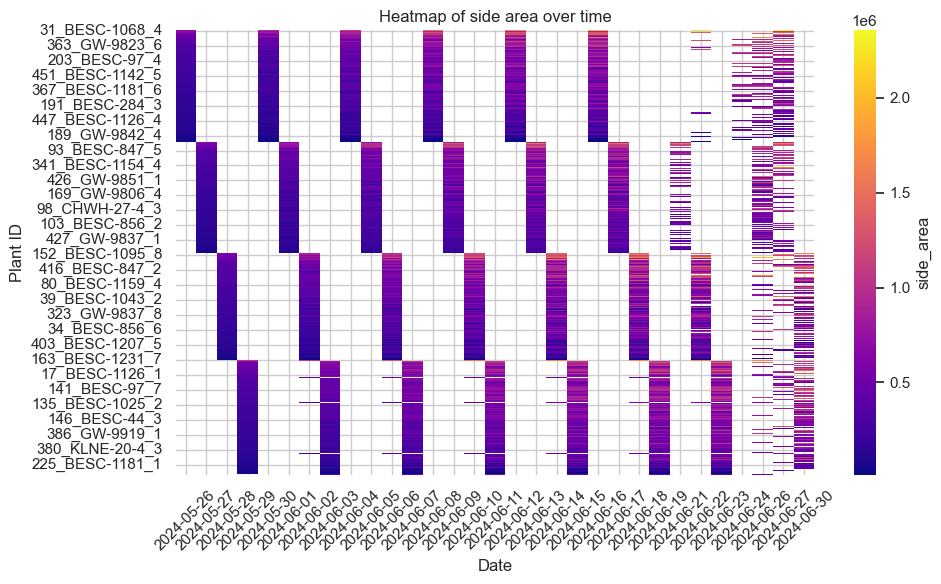

In [95]:
heatmap_data = features_df_side_top.pivot_table(
    index='Plant Info',        # y-axis
    columns='Date',     # x-axis
    values='side_area',         # fill values
    aggfunc='mean'              # take mean if duplicates
)

# Sort columns (dates) chronologically
heatmap_data = heatmap_data.sort_index(axis=1)

# Sort rows:
# 1. Group complete rows first, incomplete rows later
# 2. Within complete rows, sort by total side_area descending
complete_mask = heatmap_data.notna().all(axis=1)
complete_rows = heatmap_data[complete_mask].sort_values(by=heatmap_data.columns.tolist(), ascending=False, axis=0)
incomplete_rows = heatmap_data[~complete_mask].sort_values(by=heatmap_data.columns.tolist(), ascending=False, axis=0)

# Combine them
heatmap_data_sorted = pd.concat([complete_rows, incomplete_rows])

# Plot heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_sorted, cmap='plasma', cbar_kws={'label': 'side_area'})
plt.title('Heatmap of side area over time')
plt.xlabel('Date')
plt.ylabel('Plant ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:

##  Define date groups and labels
bins = [
    '2024-05-26', '2024-05-30', '2024-06-04', '2024-06-08',
    '2024-06-12', '2024-06-16', '2024-06-20', '2024-06-24', '2024-06-30', '2024-07-01'
]
labels = [
    'May26-29','May30-Jun03','Jun04-07','Jun08-11',
    'Jun12-15','Jun16-19','Jun20-23','Jun24-27','Jun30'
]

In [97]:
features_df_side_top['Timepoint'] = pd.cut(features_df_side_top['Date'], bins=pd.to_datetime(bins), labels=labels, right=False)
features_df_side_top['Timepoint'] = pd.Categorical(features_df_side_top['Timepoint'], categories=labels, ordered=True)

# ----------------------------
# 3. Map Timepoint codes to day values
## Define the day values corresponding to the timepoints
day_values = [0, 4, 8, 12, 16, 20, 24, 28, 31]
features_df_side_top['Day'] = features_df_side_top['Timepoint'].cat.codes.apply(
    lambda x: day_values[x] if x >= 0 else np.nan
)

In [98]:
# Count number of samples per Plant Info and Timepoint
counts = features_df_side_top.groupby(['Plant Info', 'Timepoint']).size().reset_index(name='sample_count')

# Filter those with more than 1 sample
duplicates = counts[counts['sample_count'] > 1]


/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/1022974130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = features_df_side_top.groupby(['Plant Info', 'Timepoint']).size().reset_index(name='sample_count')


In [99]:
print(len(duplicates)) # where 8 duplicates happen in one day. 


34


In [100]:
duplicate_rows = features_df_side_top.merge(duplicates[['Plant Info', 'Timepoint']], on=['Plant Info', 'Timepoint'])
print("Original dataframe replicated rows：")
print(duplicate_rows)

Original dataframe replicated rows：
           Analyse Date       Plant Info  side_area  side_convex_hull_area  \
0   2024-05-29 00:22:39  296_BESC-1009_6   261000.0              1516741.0   
1   2024-05-29 21:14:35  296_BESC-1009_6   279062.0              1525708.0   
2   2024-06-21 08:48:06    421_BESC-56_3   631747.0              3280242.5   
3   2024-06-21 08:54:56  423_BESC-1126_8   859188.0              4267538.0   
4   2024-06-21 09:01:34   424_BESC-117_6   669125.0              2818637.5   
..                  ...              ...        ...                    ...   
63  2024-06-27 09:07:40    363_GW-9823_6  1346703.0              6716875.0   
64  2024-06-27 09:14:33    364_GW-9842_7   312649.0              1370285.5   
65  2024-06-27 09:21:08    365_BESC-45_3   711289.0              4955271.5   
66  2024-06-27 09:27:58  366_BESC-1145_2   670391.0              1831274.0   
67  2024-06-27 11:01:46  360_BESC-1142_8   957145.0              3946013.0   

    side_solidity  side_per

#### 2.1 Imputation

In [101]:
# prepare a full grid of Plant Info x Day
plants = features_df_side_top['Plant Info'].unique()

full_grid = pd.MultiIndex.from_product([plants, day_values], names=['Plant Info','Day']).to_frame(index=False)
# ----------------------------
# 5. Fill Timepoint labels based on numeric positions
day_to_tp = dict(zip(day_values, labels))

# Map Day to Timepoint
full_grid['Timepoint'] = full_grid['Day'].map(day_to_tp)

full_grid['Timepoint'] = pd.Categorical(full_grid['Timepoint'], categories=labels, ordered=True)

In [110]:
print(full_grid.shape)
print(features_df_side_top['Day'].nunique())
print(features_df_side_top['Plant Info'].nunique())
print(features_df_side_top['Plant Info'].nunique()*features_df_side_top['Day'].nunique())



(4014, 3)
9
446
4014


In [112]:
# Merge original data onto full grid # for the timepoint Jun24-Jun27, some plants has more than 2 measurements,
# to merge merge with the mean of the measurenments, aggregate the df 
metric_cols = [col for col in features_df_side_top.columns if col not in ['Analyse Date','Plant Info','Date','Genotype','Replicate','Timepoint','Day']]
features_agg = features_df_side_top.groupby(
    ['Plant Info','Day','Timepoint'], as_index=False, observed=True
)[metric_cols].mean()     

## Final merge
df_full_side_top = pd.merge(full_grid, features_agg, on=['Plant Info','Day','Timepoint'], how='left')
print(df_full_side_top.shape)

(4014, 103)


In [113]:
# ----------------------------
# other processing
## Split into 2 new columns
df_full_side_top[['Genotype', 'Replicate']] = df_full_side_top['Plant Info'].str.extract(r'^\d+_(.+)_(\d+)$')

# Convert Replicate to integer if needed
df_full_side_top['Replicate'] = df_full_side_top['Replicate'].astype(int)

In [114]:
missing_summary = (
    df_full_side_top[df_full_side_top['side_area'].isna()]
    .groupby('Timepoint')['Plant Info']
    .nunique()
    .reset_index(name='n_Plant_Info_with_missing')
)

print(missing_summary)

     Timepoint  n_Plant_Info_with_missing
0     May26-29                          1
1  May30-Jun03                          0
2     Jun04-07                          0
3     Jun08-11                          0
4     Jun12-15                          0
5     Jun16-19                          0
6     Jun20-23                        175
7     Jun24-27                        156
8        Jun30                        301


/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/3262984173.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Timepoint')['Plant Info']


In [115]:
missing_genotypes = (
    df_full_side_top[
        (df_full_side_top['Timepoint'] == 'May26-29')
        & (df_full_side_top['side_area'].isna())
    ]['Plant Info']
)
print(missing_genotypes)

4005    297_BESC-284_4
Name: Plant Info, dtype: object


In [116]:
df_side_top_imputed = df_full_side_top.sort_values(['Plant Info','Day']).copy()

df_side_top_imputed[metric_cols] = df_side_top_imputed.groupby('Plant Info')[metric_cols].transform(lambda g: g.interpolate(method='linear', limit_direction='both'))


In [117]:
df_side_top_imputed.isnull().any().any()

False

In [ ]:
#df_side_top_imputed.to_csv('../result/side_top_features_vit_linearimputed_bygroup.csv', index=False)


/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/2070176698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)


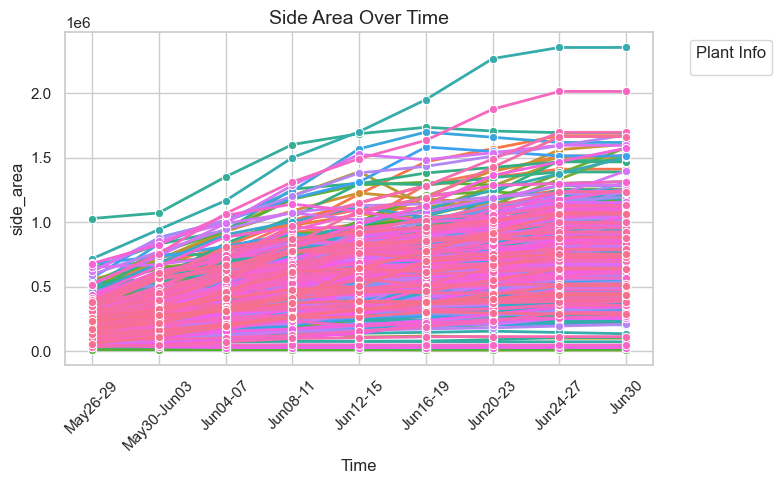

/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/2070176698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)


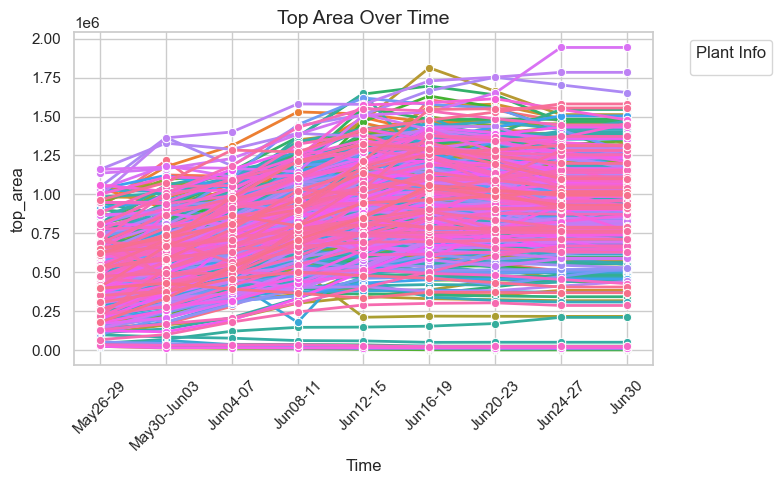

In [170]:
features_df_side_top_imputed =  pd.read_csv('../result/side_top_features_vit_linearimputed_bygroup.csv')

plot_over_time(df_side_top_imputed, x_col='Timepoint', y_col='side_area', hue_col='Plant Info',
                      title='Side Area Over Time',show_legend=False)
plot_over_time(df_side_top_imputed, x_col='Timepoint', y_col='top_area', hue_col='Plant Info',
                      title='Top Area Over Time',show_legend=False)

### 3 Impute by day

In [ ]:
##### function to interpolate daily data for each plant
def interpolate_daily(df,cols_to_impute, plant_col="Plant Info", time_col="Date",method="linear"):
    # Ensure datetime format
    df[time_col] = pd.to_datetime(df[time_col])

    # Sort by Plant and Date
    df = df.sort_values([plant_col, time_col]).reset_index(drop=True)

    # Create a complete date range for each Plant.Info
    all_dates = pd.date_range(start=df[time_col].min(), end=df[time_col].max(), freq='D')
    all_plants = df[plant_col].unique()
    full_index = pd.MultiIndex.from_product([all_plants, all_dates], names=[plant_col,time_col])
    df_full = df.set_index([plant_col, time_col]).reindex(full_index).reset_index()

    # Ensure numeric type
    df_full[cols_to_impute] = df_full[cols_to_impute].apply(pd.to_numeric, errors='coerce')

    # Interpolate linearly per plant across dates, then fill edges
    df_full[cols_to_impute] = (
        df_full
        .groupby(plant_col)[cols_to_impute]
        .apply(lambda g: g.interpolate(method='linear').ffill().bfill())
    .reset_index(level=0, drop=True)
)
    return df_full

In [ ]:
##### 3.1 read non_imputed data
features_df_side_top = pd.read_csv('../data/side_top_features_vit.csv')
features_df_side_top.columns



Index(['Analyse Date', 'Plant Info', 'side_area', 'side_convex_hull_area',
       'side_solidity', 'side_perimeter', 'side_width', 'side_height',
       'side_longest_path', 'side_center_of_mass_x',
       ...
       'top_hue_mean', 'top_hue_var', 'top_hue_max', 'top_saturation_mean',
       'top_saturation_var', 'top_saturation_max', 'top_value_mean',
       'top_value_var', 'top_value_min', 'top_value_max'],
      dtype='object', length=102)

In [131]:
features_df_side_top["Analyse Date"] = pd.to_datetime(
    features_df_side_top["Analyse Date"]
)


features_df_side_top['Date'] = features_df_side_top['Analyse Date'].dt.date

In [132]:
metric_cols = [col for col in features_df_side_top.columns if col not in ['Analyse Date','Plant Info','Date','Genotype','Replicate']]

In [133]:
# 3.2 Make sure every (Plant, Date) pair is unique

# helper: midpoint of times within a group
def midpoint_time(series):
    return series.min() + (series.max() - series.min()) / 2
# For any (Plant, Date) that appears multiple times,
# → it averages all numeric columns (your traits).
# → and replaces all timestamps that day with the midpoint between earliest and latest.
# For (Plant, Date) with only one row, it stays unchanged.

# group by plant and date, aggregate
features_df_side_top_fixed = (
    features_df_side_top.groupby(["Plant Info", "Date"], as_index=False)
      .agg({
          "Analyse Date": midpoint_time,        # midpoint of timestamps that day
          **{
              col: "mean"
              for col in metric_cols    # average numeric traits
          }
      })
)
# clean up: sort and reset index
features_df_side_top = features_df_side_top.sort_values(["Plant Info", "Analyse Date"]).reset_index(drop=True)


In [135]:
sample_counts = features_df_side_top_fixed.groupby(['Plant Info', 'Analyse Date']).size().reset_index(name='sample_count')
all_one = (sample_counts['sample_count'] == 1).all()
print("All groups have exactly 1 sample?", all_one)

All groups have exactly 1 sample? True


In [136]:
features_df_side_top_fixed = features_df_side_top_fixed.drop(columns=['Analyse Date'])

In [137]:
##### 3.3 impute by day based on day_time for each dataset
features_df_side_top_imputed = interpolate_daily(
    features_df_side_top_fixed,
    cols_to_impute=metric_cols,
    plant_col="Plant Info",
    time_col="Date",
    method="linear"
)


In [138]:
print(features_df_side_top_imputed.shape)

(16056, 102)


In [140]:
# ----------------------------
# other processing
## Split into 2 new columns
features_df_side_top_imputed[['Genotype', 'Replicate']] = features_df_side_top_imputed['Plant Info'].str.extract(r'^\d+_(.+)_(\d+)$')

# Convert Replicate to integer if needed
features_df_side_top_imputed['Replicate'] = features_df_side_top_imputed['Replicate'].astype(int)

/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/2935776728.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_df_side_top_imputed[['Genotype', 'Replicate']] = features_df_side_top_imputed['Plant Info'].str.extract(r'^\d+_(.+)_(\d+)$')
/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/2935776728.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_df_side_top_imputed[['Genotype', 'Replicate']] = features_df_side_top_imputed['Plant Info'].str.extract(r'^\d+_(.+)_(\d+)$')


In [ ]:
#features_df_side_top_imputed.to_csv('../result/side_top_features_vit_linearimputed_day.csv', index=False)


/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/2070176698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)


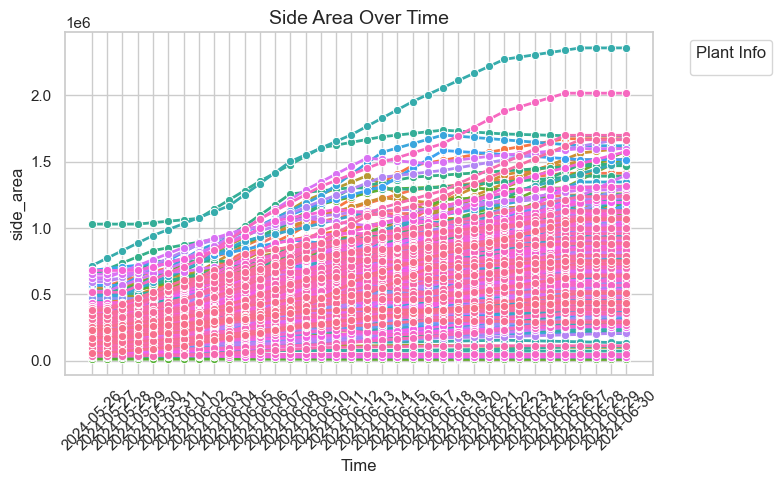

/var/folders/0r/r2dplk4d72d437ygr7ycq8kw0000gn/T/ipykernel_27911/2070176698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc=legend_loc)


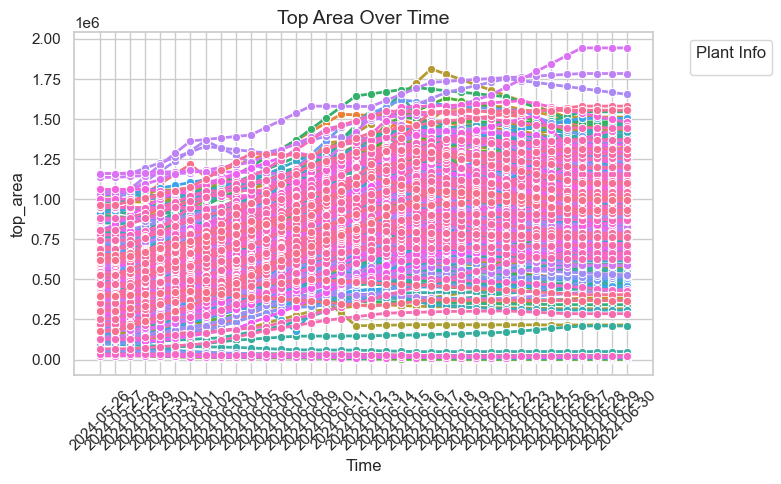

In [167]:
features_df_side_top_imputed =  pd.read_csv('../result/side_top_features_vit_linearimputed_day.csv')

plot_over_time(features_df_side_top_imputed, x_col='Date', y_col='side_area', hue_col='Plant Info',
                      title='Side Area Over Time',show_legend=False)
plot_over_time(features_df_side_top_imputed, x_col='Date', y_col='top_area', hue_col='Plant Info',title='Top Area Over Time',show_legend=False)

### 4 Check traits correlation

In [147]:
features_df = features_df_side_top_imputed[metric_cols]

In [148]:
corr_matrix = features_df.corr()  #

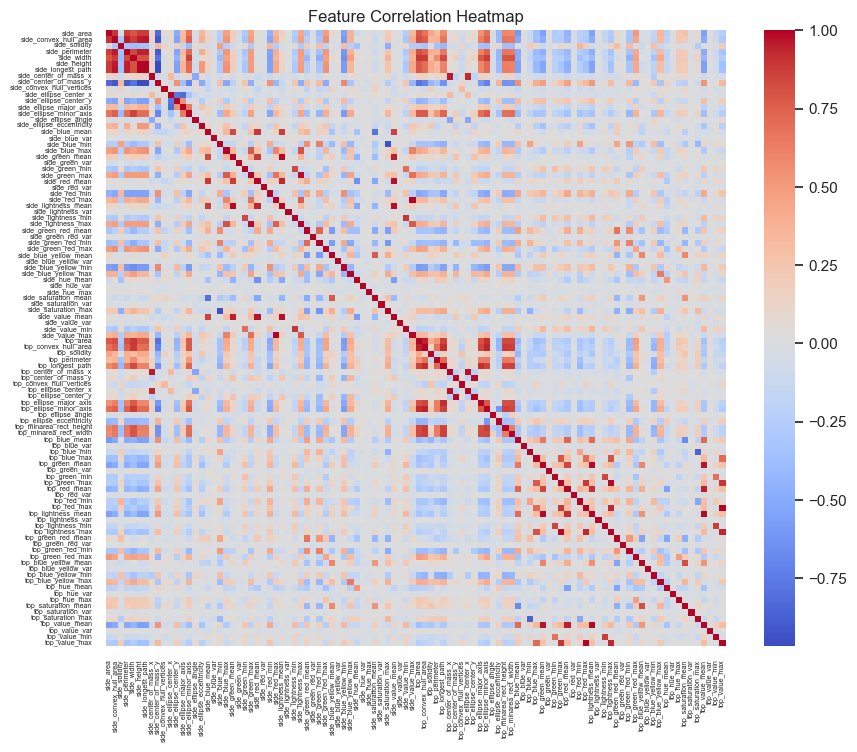

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            #annot=True, 
            fmt=".2f", cmap='coolwarm', xticklabels=True,
    yticklabels=True,cbar=True)
plt.title("Feature Correlation Heatmap")
# Reduce font size for axis labels
plt.xticks(fontsize=5, rotation=90)
plt.yticks(fontsize=5, rotation=0)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()

In [150]:
corr_matrix_abs = corr_matrix.abs()  # absolute correlation

# Select upper triangle (without diagonal)
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# Find feature pairs with correlation > threshold, e.g., 0.9
threshold = 0.9
high_corr = [(col1, col2, upper.loc[col1, col2])
             for col1 in upper.columns
             for col2 in upper.index
             if pd.notna(upper.loc[col1, col2]) and upper.loc[col1, col2] > threshold]

# Convert to DataFrame for easy viewing
high_corr_df = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Correlation'])
print(high_corr_df)

                 Feature1                Feature2  Correlation
0               side_area   side_convex_hull_area     0.907214
1   side_convex_hull_area          side_perimeter     0.960696
2   side_convex_hull_area             side_height     0.960359
3   side_convex_hull_area       side_longest_path     0.961659
4   side_convex_hull_area   side_center_of_mass_y     0.916364
5          side_perimeter             side_height     0.950187
6          side_perimeter       side_longest_path     0.950315
7             side_height       side_longest_path     0.996375
8             side_height   side_center_of_mass_y     0.966836
9       side_longest_path   side_center_of_mass_y     0.965962
10  side_center_of_mass_x    top_center_of_mass_x     0.955531
11  side_center_of_mass_x    top_ellipse_center_x     0.928997
12          side_blue_min     side_saturation_max     0.940091
13        side_green_mean     side_lightness_mean     0.990416
14        side_green_mean         side_value_mean     0

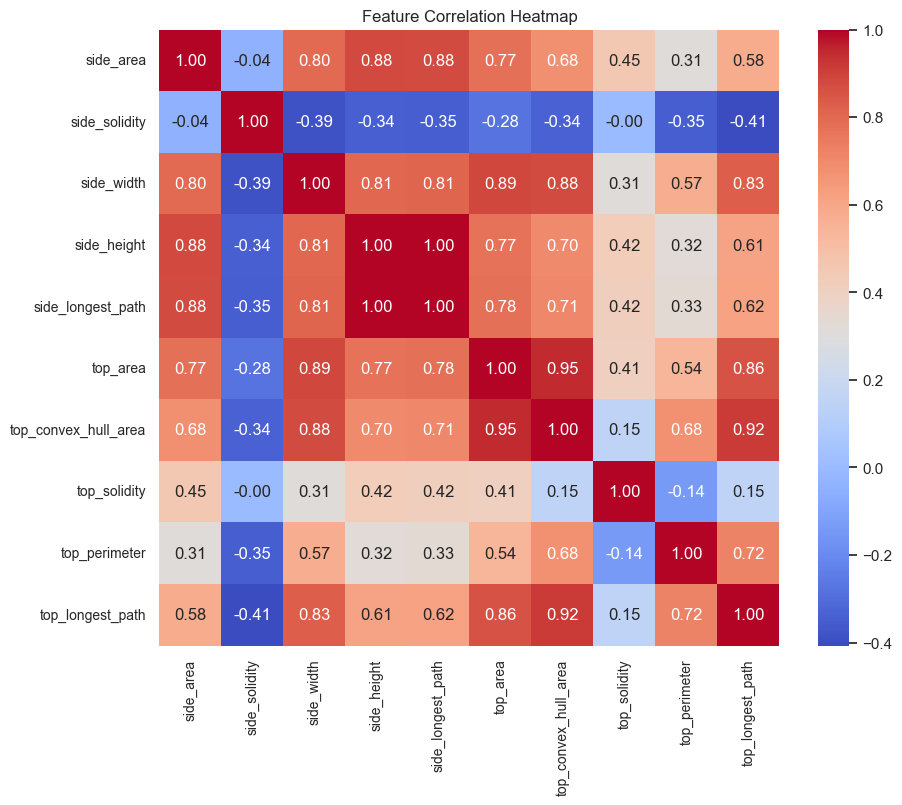

In [151]:
plt.figure(figsize=(10, 8))
sns.heatmap(features_df[['side_area', 'side_solidity',  'side_width', 'side_height', 'side_longest_path','top_area', 'top_convex_hull_area',
       'top_solidity', 'top_perimeter','top_longest_path']].corr(), 
            annot=True, 
            fmt=".2f", cmap='coolwarm', xticklabels=True,
    yticklabels=True,cbar=True)
plt.title("Feature Correlation Heatmap")
# Reduce font size for axis labels
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()
#delete 'side_convex_hull_area','side_longest_path','top_longest_path','side_perimeter',

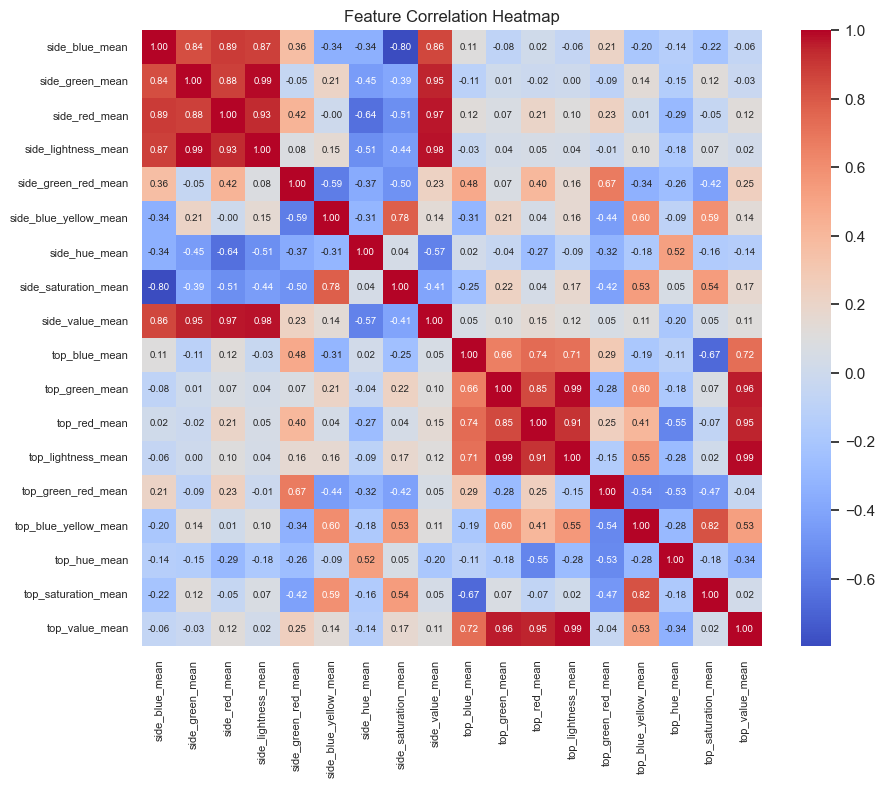

In [152]:
plt.figure(figsize=(10, 8))
sns.heatmap(features_df.filter(regex='_mean$').corr(), 
            annot=True, 
            fmt=".2f", cmap='coolwarm', xticklabels=True,
    yticklabels=True,cbar=True,annot_kws={"size": 7} )
plt.title("Feature Correlation Heatmap")
# Reduce font size for axis labels
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8, rotation=0)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()
# red, green, blue, lightness mean (value_mean)

In [153]:
traits_high_corr = ['side_blue_mean','side_green_mean','side_red_mean','side_lightness_mean',
                    'top_green_mean','top_blue_mean','top_red_mean','top_lightness_mean',
                     'side_convex_hull_area','side_longest_path','side_perimeter',
                     'top_convex_hull_area']

In [154]:
metric_cols_corr_clean = [col for col in metric_cols if col not in traits_high_corr]

In [155]:
metric_cols_clean = [col for col in metric_cols_corr_clean if not (col.endswith('min') or col.endswith('max'))]

In [156]:
print(len(metric_cols))
print(len(metric_cols_corr_clean))
print(len(metric_cols_clean))

100
88
56


In [ ]:
#Path("../data/traits_kept_top_side.txt").write_text(",".join(metric_cols_clean))

1021

### 5. Check traits correlation of side vs. top

In [158]:
df_traits_side = df_side_top_imputed.filter(regex='^side_')
df_traits_side = df_traits_side.copy()
df_traits_side.rename(columns=lambda x: x.replace('side_', ''), inplace=True)

df_traits_top = df_side_top_imputed.filter(regex='^top_')
df_traits_top = df_traits_top.copy()
df_traits_top.rename(columns=lambda x: x.replace('top_', ''), inplace=True)


In [159]:
# Compute cross-correlation
cross_corr = df_traits_top.corrwith(df_traits_side, axis=0)  # not suitable for full matrix



In [160]:
cross_corr

area                    0.763805
convex_hull_area        0.750948
solidity                0.006592
perimeter               0.365095
longest_path            0.601428
center_of_mass_x        0.953861
center_of_mass_y       -0.030782
convex_hull_vertices    0.311229
ellipse_center_x        0.293756
ellipse_center_y       -0.002434
ellipse_major_axis      0.175257
ellipse_minor_axis      0.748786
ellipse_angle          -0.023391
ellipse_eccentricity   -0.075564
blue_mean               0.101171
blue_var               -0.003462
blue_min                0.439397
blue_max               -0.132379
green_mean              0.007484
green_var              -0.007432
green_min               0.278975
green_max              -0.053192
red_mean                0.190674
red_var                -0.010304
red_min                 0.341325
red_max                -0.040620
lightness_mean          0.033055
lightness_var          -0.005125
lightness_min           0.170752
lightness_max          -0.055892
green_red_

In [161]:
# For full cross-correlation matrix (features in df1 vs df2)
cross_corr_matrix = pd.DataFrame(index=df_traits_top.columns, columns=df_traits_side.columns)

for col1 in df_traits_side.columns:
    for col2 in df_traits_top.columns:
        cross_corr_matrix.loc[col2, col1] = df_traits_side[col1].corr(df_traits_top[col2])

# Convert to float
cross_corr_matrix = cross_corr_matrix.astype(float)

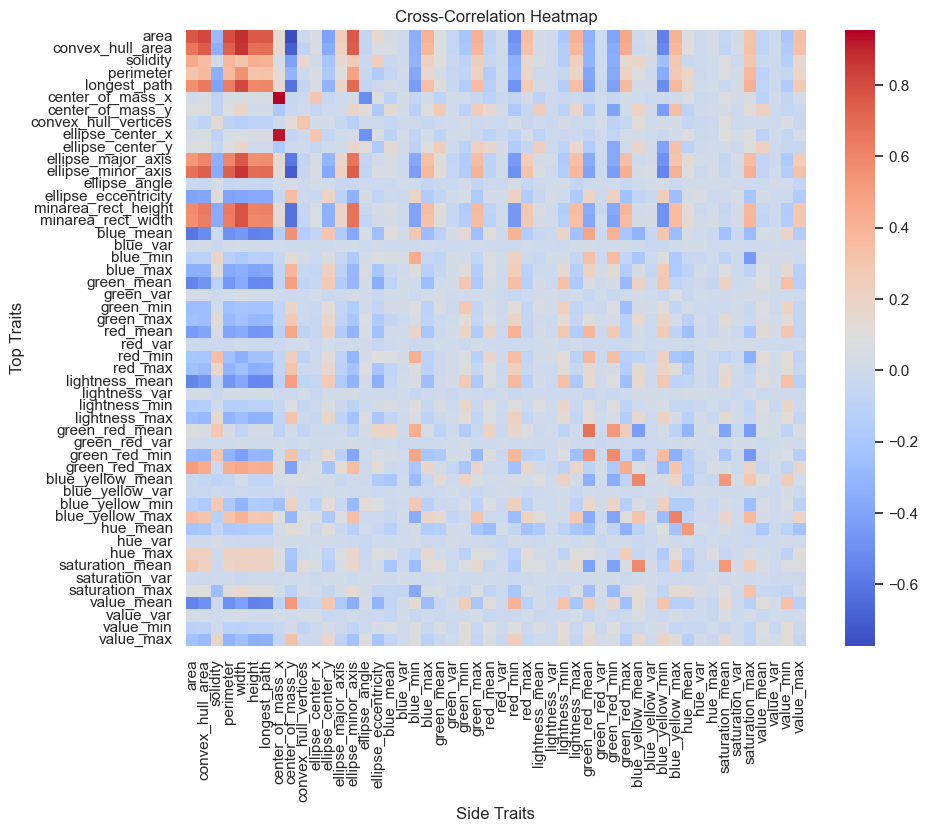

In [162]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', 
            xticklabels=True, yticklabels=True)
plt.xlabel("Side Traits")
plt.ylabel("Top Traits")
plt.title("Cross-Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

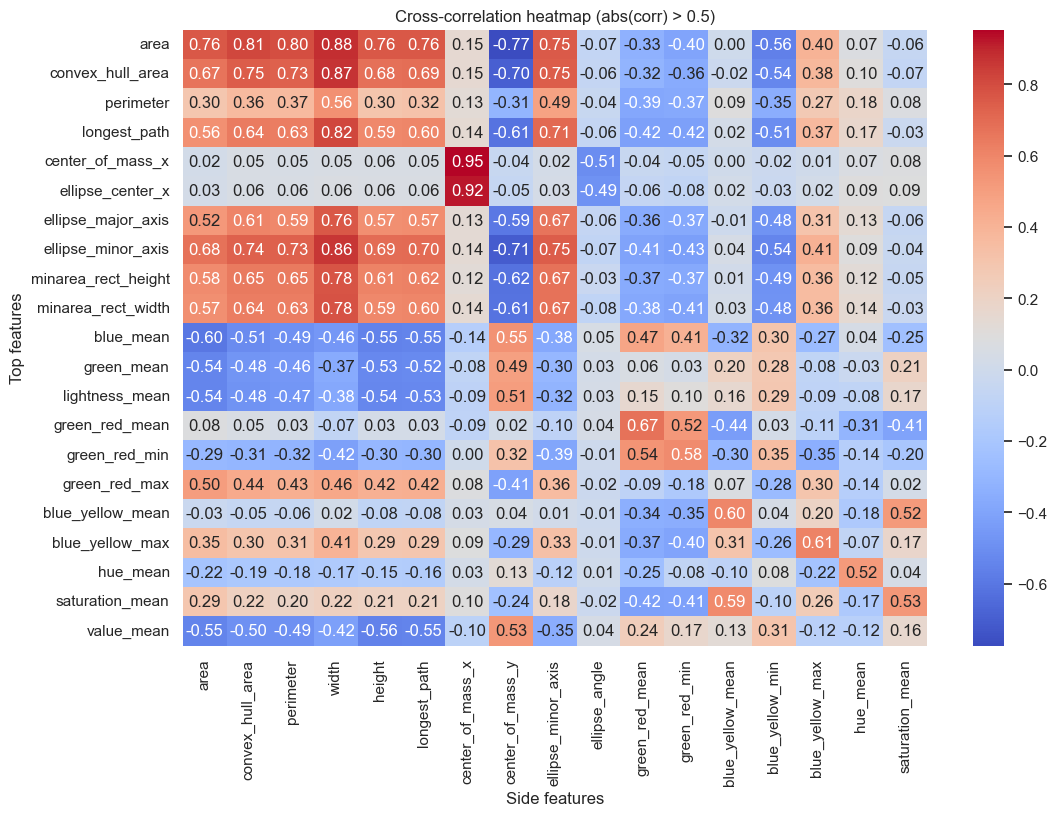

In [163]:
# Keep only columns (side features) that have at least one |corr| > 0.5
cols_to_keep = cross_corr_matrix.columns[(cross_corr_matrix.abs() > 0.5).any()]
rows_to_keep = cross_corr_matrix.index[(cross_corr_matrix.abs() > 0.5).any(axis=1)]

filtered_corr = cross_corr_matrix.loc[rows_to_keep, cols_to_keep]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cross-correlation heatmap (abs(corr) > 0.5)")
plt.xlabel("Side features")
plt.ylabel("Top features")
plt.show()

### 6. Check side_hue_max

In [164]:
features_df_side_top_imputed['side_hue_max'].describe()

count    16056.000000
mean       358.995703
std          0.081102
min        357.000000
25%        359.000000
50%        359.000000
75%        359.000000
max        359.000000
Name: side_hue_max, dtype: float64

In [166]:
features_df_side_top_imputed.groupby('Date')['side_hue_max'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2024-05-26,446.0,358.982063,0.188766,357.0,359.0,359.0,359.0,359.0
2024-05-27,446.0,358.984305,0.166862,357.0,359.0,359.0,359.0,359.0
2024-05-28,446.0,358.987444,0.138123,357.0,359.0,359.0,359.0,359.0
2024-05-29,446.0,358.990583,0.115150,357.0,359.0,359.0,359.0,359.0
2024-05-30,446.0,358.992825,0.103609,357.0,359.0,359.0,359.0,359.0
2024-05-31,446.0,358.991928,0.105265,357.0,359.0,359.0,359.0,359.0
2024-06-01,446.0,358.991031,0.116543,357.0,359.0,359.0,359.0,359.0
2024-06-02,446.0,358.990359,0.118118,357.4,359.0,359.0,359.0,359.0
2024-06-03,446.0,358.988565,0.131983,357.0,359.0,359.0,359.0,359.0
